<a href="https://colab.research.google.com/github/ESHUshri202/Fashion_Dress_predictor/blob/main/Fashion_Dress_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training data

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

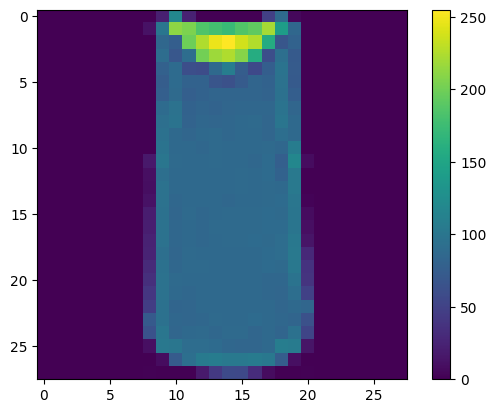

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = keras.Sequential([  #
    keras.layers.Flatten(input_shape = (28,28)), #input layer(1)
    keras.layers.Dense(128, activation = 'relu'), #hidden layer (2)
    keras.layers.Dense(10, activation = 'softmax') #output layer (3)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5000 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3779 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3397 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3140 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2972 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2690 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2489 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

In [ ]:
#evaluating the model

test_loss, test_acc = model.evaluate(test_images,test_labels,verbose =1)
print('Test Accuracy: ',test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3447 - accuracy: 0.8821
Test Accuracy:  0.882099986076355


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
test_images.shape

(10000, 28, 28)

Ankle boot


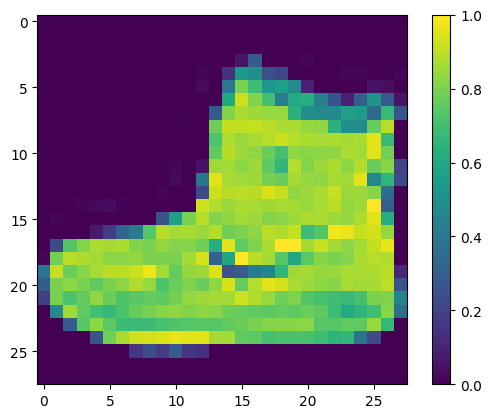

In [ ]:
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 2
1/1 [==============================] - 0s 23ms/step


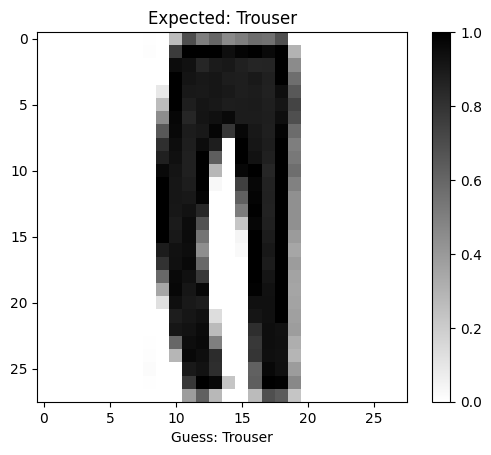

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model,image,correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    predictions = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(predictions)]
    show_image(image,class_names[correct_label],predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img,cmap = plt.cm.binary)
  plt.title("Expected: "+label)
  plt.xlabel("Guess: "+guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num= input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("try again...!!!")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model,image,label)